## Case Study: Stock Price Prediction 


<h4> The Case study is to predict Next day stock price [Adj Close Price] using  regression analysis</h4>
<p>
    We will be using Nifty 50 data for this case study<br>
    The filename '^NSEI.csv' contains the data<br>
    You need to generate  technical indicators as given below as  Features for converting Time Series to Supervised Learning Problem <br>
   <a href='https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/'> Convert time Series to Supervised Learning</a><p>
    <ul>
        <li> Moving Averages (Example Given : 3Period Moving Avearage (3MA)) </li>
        <li> Previous Day Returns </li>
        <li> Relative Stock returns </li>
    </ul>
<br>
Then you need to Train a Supervised learning algorithm and perform prediction.<br>
<a href='https://blog.quantinsti.com/random-forest-algorithm-in-python/'>Example for your Refrence </a><br>
<b> Make sure  to shift the feature by 1 period so that you will have data from t-1 period to predict price at t (look ahead bias) </b>

<strong> Please consider Testing Period after  01-01-2019 </strong>
</p>
<p>
    <b> Metrics for Evaluation </b>
    <ul>
        <li><strong> RMSE </strong></li>
     </ul>
</p>
<p> Some additional Documention for your help
    <ul>
        <li><a href='https://pandas.pydata.org/docs/'> Pandas Documentation </a> </li>
        <li><a href='https://scikit-learn.org/stable/'> Scikit Learn </a></li>
        </ul>
        </p>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Reading the Stock 
df=pd.read_csv("^NSEI.csv")

In [26]:
# Getting the head of the data
df.head()
df.describe()
df = df.dropna()

C:\Users\CASA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


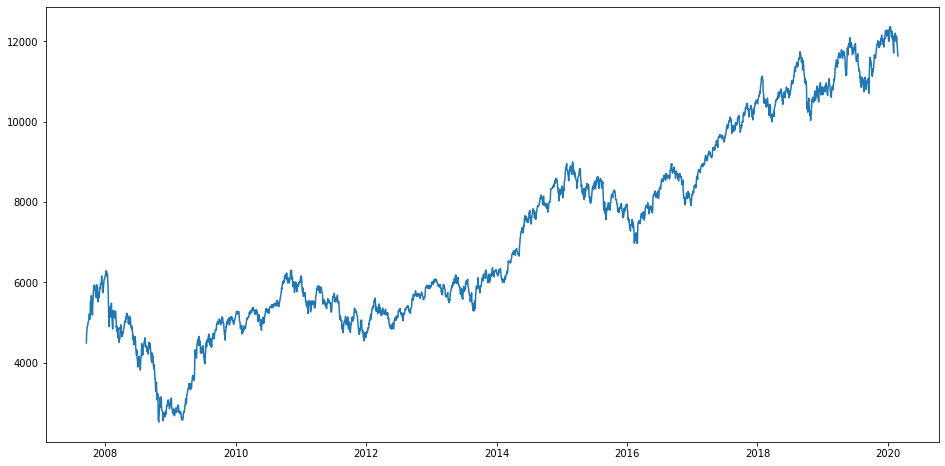

In [27]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], label='Adj Close Price history')

In [28]:
df.head()

Date         Open         High          Low        Close  \
Date                                                                        
2007-09-17 2007-09-17  4518.450195  4549.049805  4482.850098  4494.649902   
2007-09-18 2007-09-18  4494.100098  4551.799805  4481.549805  4546.200195   
2007-09-19 2007-09-19  4550.250000  4739.000000  4550.250000  4732.350098   
2007-09-20 2007-09-20  4734.850098  4760.850098  4721.149902  4747.549805   
2007-09-21 2007-09-21  4752.950195  4855.700195  4733.700195  4837.549805   

              Adj Close  Volume  
Date                             
2007-09-17  4494.649902     0.0  
2007-09-18  4546.200195     0.0  
2007-09-19  4732.350098     0.0  
2007-09-20  4747.549805     0.0  
2007-09-21  4837.549805     0.0

In [57]:
df = df.drop(['Date'], axis=1)


In [58]:
#creating train and test sets
train = df[:'01-01-2019']
test = df['01-01-2019':]

In [85]:
train



Open          High           Low         Close  \
Date                                                                 
2007-09-17   4518.450195   4549.049805   4482.850098   4494.649902   
2007-09-18   4494.100098   4551.799805   4481.549805   4546.200195   
2007-09-19   4550.250000   4739.000000   4550.250000   4732.350098   
2007-09-20   4734.850098   4760.850098   4721.149902   4747.549805   
2007-09-21   4752.950195   4855.700195   4733.700195   4837.549805   
...                  ...           ...           ...           ...   
2018-12-24  10780.900391  10782.299805  10649.250000  10663.500000   
2018-12-26  10635.450195  10747.500000  10534.549805  10729.849609   
2018-12-27  10817.900391  10834.200195  10764.450195  10779.799805   
2018-12-28  10820.950195  10893.599609  10817.150391  10859.900391   
2018-12-31  10913.200195  10923.549805  10853.200195  10862.549805   

               Adj Close    Volume  
Date                                
2007-09-17   4494.649902       0.0  
2007-09-18   4546.200195       0.0  
2007-09-19   4732.350098       0.0  
2007-09-20   4747.549805       0.0  
2007-09-21   4837.549805       0.0  
...                  ...       ...  
2018-12-24  10663.500000  223400.0  
2018-12-26  10729.849609  263700.0  
2018-12-27  10779.799805  456100.0  
2018-12-28  10859.900391  245500.0  
2018-12-31  10862.549805  180900.0  

[2757 rows x 6 columns]

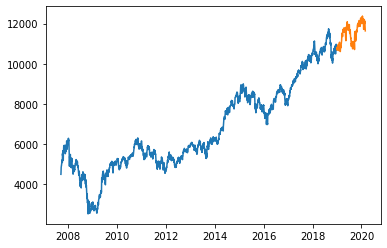

In [61]:
#Plotting data
plt.plot(train['Adj Close'], label='Adj Close Price history')
plt.plot(test['Adj Close'], label='Adj Close Price history')
plt.show()

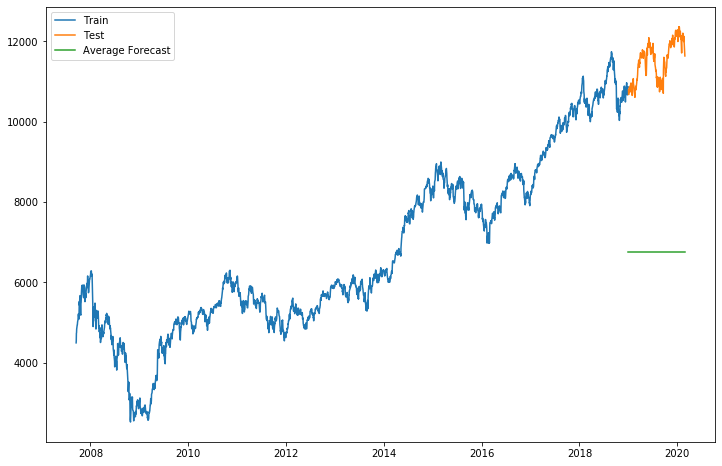

In [63]:
#Method 1: Simple Average

y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Adj Close'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Adj Close'], label='Train')
plt.plot(test['Adj Close'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [64]:
rms_simple_average = sqrt(mean_squared_error(test['Adj Close'], y_hat_avg.avg_forecast))
print(rms_simple_average)

#rms_simple_average=4798.425351594501


4798.425351594501


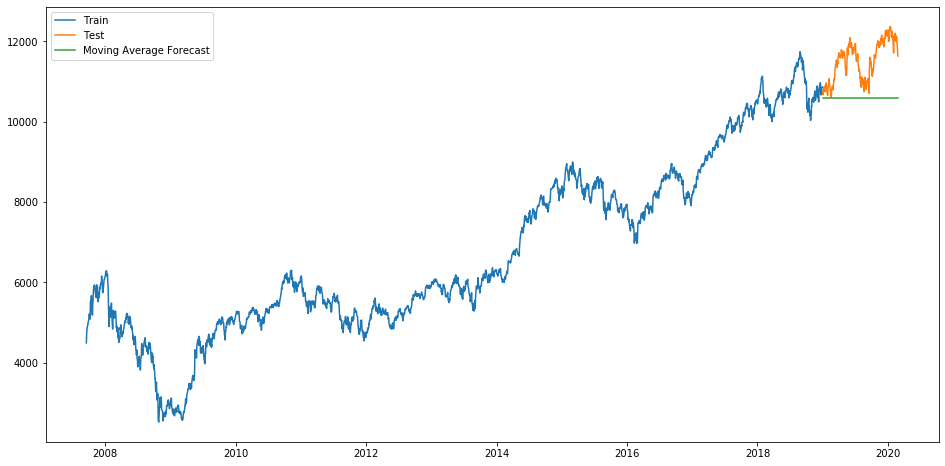

In [33]:
#Method 2: Moving Average

y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Adj Close'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Adj Close'], label='Train')
plt.plot(test['Adj Close'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()



In [34]:
rms_moving_average = sqrt(mean_squared_error(test['Adj Close'], y_hat_avg.moving_avg_forecast))
print(rms_moving_average)

# rms_moving_average=1064.609324626101

1064.609324626101


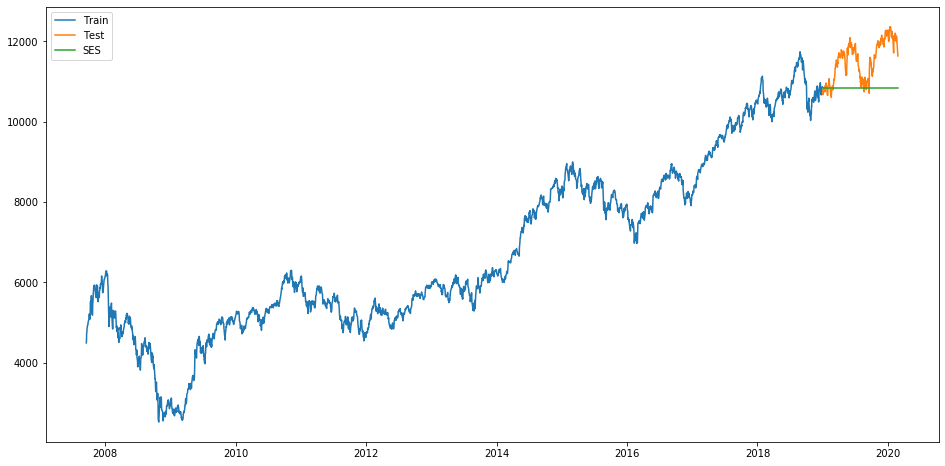

In [35]:
#Method 3: Simple Exponential Smoothing

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Adj Close'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Adj Close'], label='Train')
plt.plot(test['Adj Close'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [37]:
rms_simple_exponential_smoothing = sqrt(mean_squared_error(test['Adj Close'], y_hat_avg.SES))
print(rms_simple_exponential_smoothing)

#rms_simple_exponential_smoothing=840.4832877216422

840.4832877216422


C:\Users\CASA\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


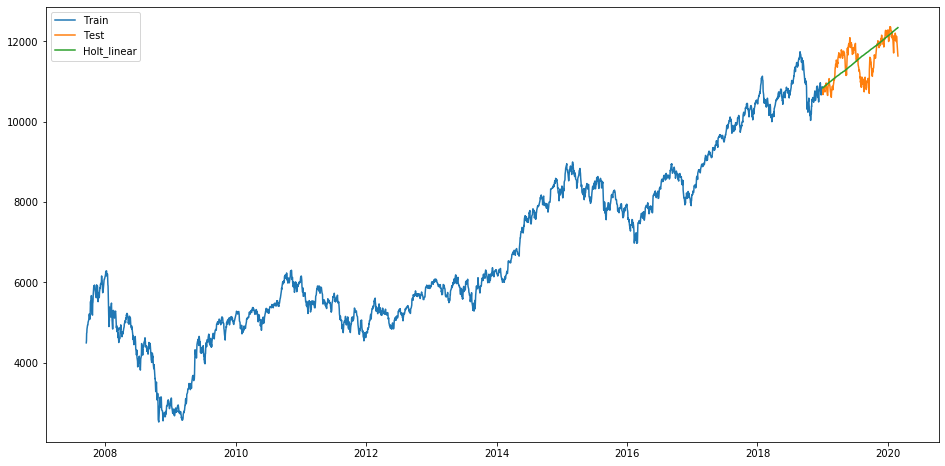

In [39]:
#Method 4: Holt’s Linear Trend method

y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Adj Close'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Adj Close'], label='Train')
plt.plot(test['Adj Close'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [40]:
rms_Holt_linear_trend = sqrt(mean_squared_error(test['Adj Close'], y_hat_avg.Holt_linear))
print(rms_Holt_linear_trend)

#rms_Holt_linear_trend=376.72247910590875

376.72247910590875


C:\Users\CASA\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\CASA\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\CASA\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


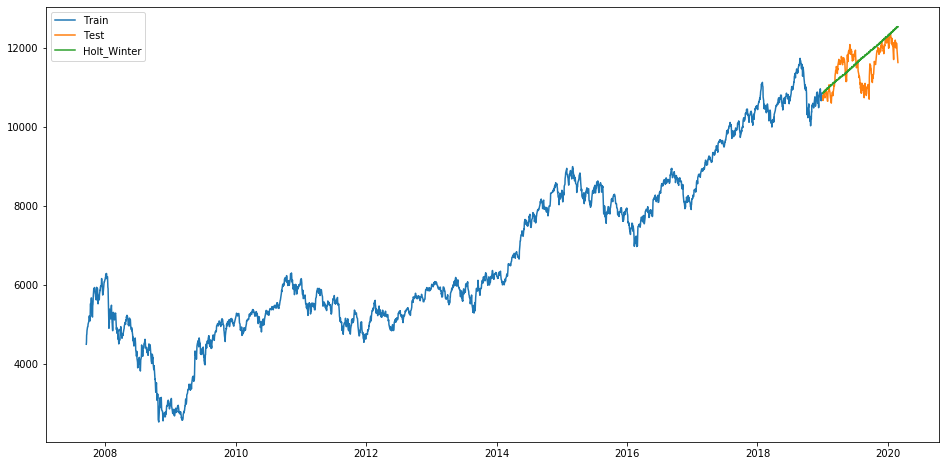

In [41]:
#Method 5: Holt-Winters Method

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Adj Close']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Adj Close'], label='Train')
plt.plot(test['Adj Close'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [42]:
rms_holt_winter = sqrt(mean_squared_error(test['Adj Close'], y_hat_avg.Holt_Winter))
print(rms_holt_winter)

#rms_Holt_winter=426.2491829596147

426.2491829596147


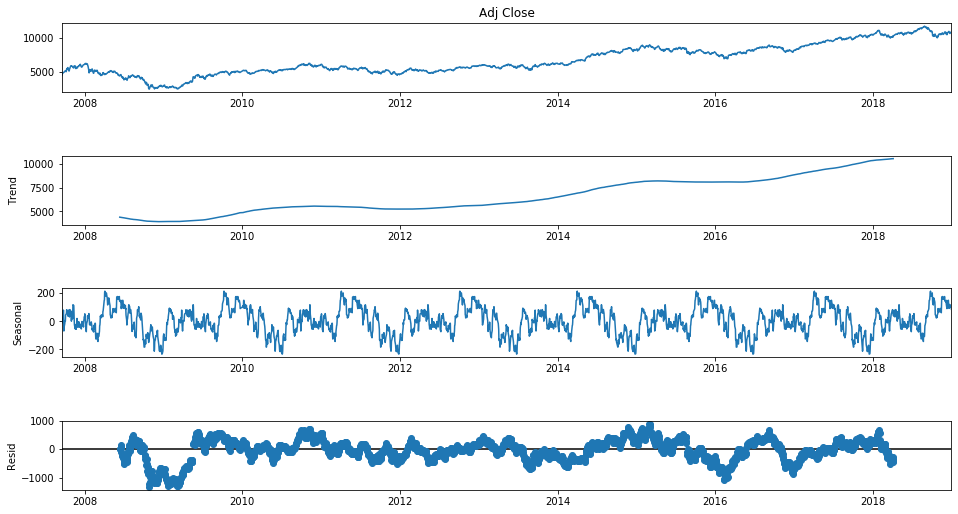

In [66]:
#Method 6: ARIMA

res = sm.tsa.seasonal_decompose(train['Adj Close'],period=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()


In [67]:
resDiff = sm.tsa.arma_order_select_ic(train['Adj Close'], max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

C:\Users\CASA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\CASA\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\CASA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\CASA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\CASA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\CASA\

C:\Users\CASA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\CASA\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\CASA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\CASA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\CASA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\CASA\

ARMA(p,q) = (6, 4) is the best.


In [ ]:
# ARMA(p,q) = (6, 4) is the best.

In [105]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')
import numpy as np
import statsmodels.api as sm

In [108]:
df_unindex=df.reset_index()

train_unindexed=df_unindex[:2757]
test_unindexed=df_unindex[2757:]


In [111]:
test_unindexed


Date          Open          High           Low         Close  \
2757 2019-01-02  10868.849609  10895.349609  10735.049805  10792.500000   
2758 2019-01-03  10796.799805  10814.049805  10661.250000  10672.250000   
2759 2019-01-04  10699.700195  10741.049805  10628.650391  10727.349609   
2760 2019-01-07  10804.849609  10835.950195  10750.150391  10771.799805   
2761 2019-01-08  10786.250000  10818.450195  10733.250000  10802.150391   
...         ...           ...           ...           ...           ...   
3034 2020-02-20  12119.000000  12152.000000  12071.450195  12080.849609   
3035 2020-02-24  12012.549805  12012.549805  11813.400391  11829.400391   
3036 2020-02-25  11877.500000  11883.049805  11779.900391  11797.900391   
3037 2020-02-26  11738.549805  11783.250000  11639.599609  11678.500000   
3038 2020-02-27  11661.250000  11663.849609  11536.700195  11633.299805   

         Adj Close    Volume  
2757  10792.500000  309700.0  
2758  10672.250000  286200.0  
2759  10727.349609  296600.0  
2760  10771.799805  269400.0  
2761  10802.150391  277700.0  
...            ...       ...  
3034  12080.849609  502600.0  
3035  11829.400391  490800.0  
3036  11797.900391  461000.0  
3037  11678.500000  567600.0  
3038  11633.299805  608600.0  

[282 rows x 7 columns]

In [112]:
fit1 = sm.tsa.statespace.SARIMAX(train_unindexed['Adj Close'],order=(6,1,4),seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2757
Model:               SARIMAX(6, 1, 4)   Log Likelihood              -15803.043
Date:                Wed, 16 Sep 2020   AIC                          31628.086
Time:                        18:15:31   BIC                          31693.199
Sample:                             0   HQIC                         31651.610
                               - 2757                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4220      0.156     -2.713      0.007      -0.727      -0.117
ar.L2         -0.0660      0.148     -0.445      0.656      -0.357       0.225
ar.L3          0.0335      0.141      0.237      0.812      -0.243       0.310
ar.L4         -0.6775      0.135     -5.002      0.000      -0.943      -0.412
ar.L5         -0.0009      0.026     -0.035      0.972      -0.051       0.049
ar.L6         -0.0373      0.018     -2.058      0.040      -0.073      -0.002
ma.L1          0.5001      0.188      2.659      0.008       0.132       0.869
ma.L2          0.0989      0.161      0.614      0.539      -0.217       0.415
ma.L3         -0.0450      0.166     -0.271      0.786      -0.370       0.280
ma.L4          0.6406      0.174      3.677      0.000       0.299       0.982
sigma2      5732.3825    785.217      7.300      0.000    4193.385    7271.380
===================================================================================
Ljung-Box (Q):                       39.00   Jarque-Bera (JB):              1681.32
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

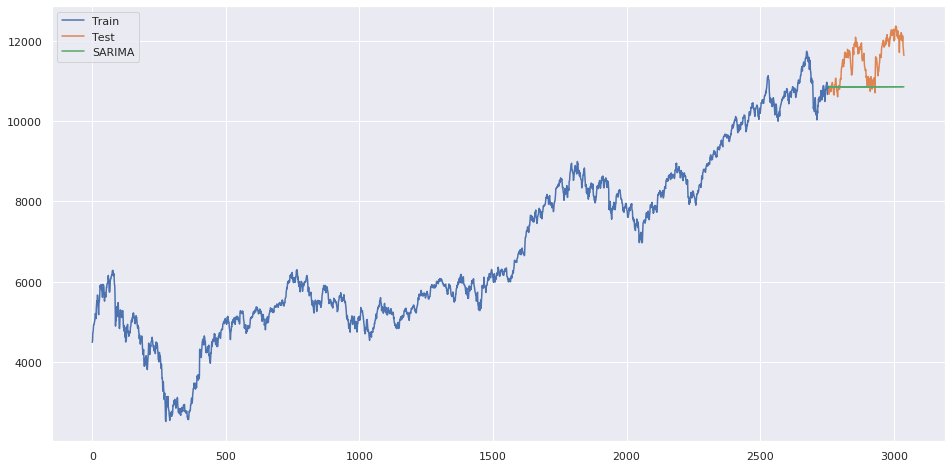

In [113]:
y_hat_avg = test_unindexed.copy()
y_hat_avg['SARIMA'] = fit1.predict(start=2757, end=3038, dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train_unindexed['Adj Close'], label='Train')
plt.plot(test_unindexed['Adj Close'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()


In [115]:
rms_arima = sqrt(mean_squared_error(test_unindexed['Adj Close'], y_hat_avg.SARIMA))
print(rms_arima)

#rms_arima=835.4921708582501

835.4921708582501


In [117]:
#Resultados finales

data = {'Model':  ['Simple Average', 
                   'Moving Average',
                   'Simple Exponential Smoothing',
                   'Holt Linear Trend',
                   'Holt_winter',
                   'Arima(6,1,4)'],
        'RMSE': ['4798.43',
                 '1064.61',
                 '840.48',
                 '376.72',
                 '426.25',
                 '835.49']}

Results = pd.DataFrame (data, columns = ['Model','RMSE'])

print (Results)

                          Model     RMSE
0                Simple Average  4798.43
1                Moving Average  1064.61
2  Simple Exponential Smoothing   840.48
3             Holt Linear Trend   376.72
4                   Holt_winter   426.25
5                  Arima(6,1,4)   835.49
